<a href="https://colab.research.google.com/github/ddocs/BTC-sentiment-analysis/blob/main/sentiment_analysis_twitter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Description: Sentiment analysis of BTC from Twitter users using python. 

In [ ]:
# import the libraries
import tweepy
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [ ]:
# Load the data
from google.colab import files
uploaded = files.upload()

Saving login.csv to login.csv


In [ ]:
# Get the data
log = pd.read_csv('login.csv')


In [ ]:
# Twitter API credentials
consumerKey = log['key'][0]
consumerSecret = log['key'][1]
accessToken = log['key'][2]
accessTokenSecret = log['key'][3]

In [ ]:
# Create the authentication object
authenticate = tweepy.OAuthHandler(consumerKey, consumerSecret)

# Set the access token and access token secret
authenticate.set_access_token(accessToken, accessTokenSecret)

# Create the API object while passing in the auth information
api = tweepy.API(authenticate, wait_on_rate_limit = True)

In [ ]:
# Extract 100 tweets from the Twitter user
posts = api.user_timeline(screen_name ="ElonMusk", count=100, lang = "en", tweet_mode="extended")

# Print the last 5 tweets from the account
print("Show the 5 most recent tweets: \n")
i =1
for tweet in posts[0:5]:
  print(str(i) + ') '+ tweet.full_text + '\n')
  i = i + 1

                   

Show the 5 most recent tweets: 

1) @Teslarati @13ericralph31 I love carbs

2) @RenataKonkoly @TheBabylonBee Pretty much an average day back then

3) @TheBabylonBee εἰδέναι μὲν μηδὲν πλὴν αὐτὸ τοῦτο εἰδέναι

4) @Aakashy78549221 @tesla_raj Nice

5) @RationalEtienne @tesla_raj Maybe we should advertise informationally just so people know stuff like this exists



In [ ]:
# Create a dataframe with a column called Tweets
df = pd.DataFrame( [tweet.full_text for tweet in posts], columns=['Tweets'])

# Show the first 5 rows of data
df.head()



,Tweets
0,@Teslarati @13ericralph31 I love carbs
1,@RenataKonkoly @TheBabylonBee Pretty much an a...
2,@TheBabylonBee εἰδέναι μὲν μηδὲν πλὴν αὐτὸ τοῦ...
3,@Aakashy78549221 @tesla_raj Nice
4,@RationalEtienne @tesla_raj Maybe we should ad...


In [ ]:
# Clean the text

# Create a function to clean the tweets
def cleanTxt(text):
  text = re.sub(r'@[A-Za-z0-9]+', '', text) # Removes @mentions
  text = re.sub(r'#', '', text) # Removes the '#' symbol
  text = re.sub(r'RT[\s]+', '', text) # Removes RT
  text = re.sub(r'https?:\/\/\S+', '', text) # Removes the hyperlink

  return text

# Cleaning text

df['Tweets']= df['Tweets'].apply(cleanTxt)

# Show the clean text
df

,Tweets
0,I love carbs
1,Pretty much an average day back then
2,εἰδέναι μὲν μηδὲν πλὴν αὐτὸ τοῦτο εἰδέναι
3,_raj Nice
4,_raj Maybe we should advertise informationall...
5,_raj Most people have no idea just how good t...
6,"_raj Oh man, home hvac that is super energy e..."
7,_raj New HVAC firmware coming soon that will m...
8,"True, we somewhat overcompensated on Bluetoo..."
9,🤣🤣


In [ ]:
# Create a function to get the subjectivity
def getSubjectivity(text):
  return TextBlob(text).sentiment.subjectivity

# Create a function to get the polarity 
def getPolarity(text):
  return TextBlob(text).sentiment.polarity

# Create two new columns
df['Subjectivity'] = df['Tweets'].apply(getSubjectivity)
df['Polarity'] = df['Tweets'].apply(getPolarity)

# Show the new dataframe with the new columns
df

,Tweets,Subjectivity,Polarity
0,I love carbs,0.600000,0.500000
1,Pretty much an average day back then,0.466667,0.033333
2,εἰδέναι μὲν μηδὲν πλὴν αὐτὸ τοῦτο εἰδέναι,0.000000,0.000000
3,_raj Nice,1.000000,0.600000
4,_raj Maybe we should advertise informationall...,0.000000,0.000000
5,_raj Most people have no idea just how good t...,0.493750,0.393750
6,"_raj Oh man, home hvac that is super energy e...",0.512500,0.308333
7,_raj New HVAC firmware coming soon that will m...,0.454545,0.136364
8,"True, we somewhat overcompensated on Bluetoo...",0.409722,0.123611
9,🤣🤣,0.000000,0.000000


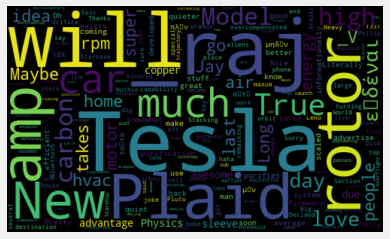

In [ ]:
# Plot Word Cloud
allWords = ' '.join( [twts for twts in df['Tweets']])
wordCloud = WordCloud(width = 500, height = 300, random_state = 21, max_font_size = 110).generate(allWords)

plt.imshow(wordCloud, interpolation = "bilinear")
plt.axis('off')
plt.show()

In [ ]:
#@title
# Create a function to compute the negative, neutral and positive analysis
def getAnalysis(score):
  if score < 0:
    return 'Negative'
  elif score == 0:
    return 'Neutral'
  else:
    return 'Positive'
  
df['Analysis'] = df['Polarity'].apply(getAnalysis)

# Show the dataframe
df

,Tweets,Subjectivity,Polarity,Analysis
0,I love carbs,0.600000,0.500000,Positive
1,Pretty much an average day back then,0.466667,0.033333,Positive
2,εἰδέναι μὲν μηδὲν πλὴν αὐτὸ τοῦτο εἰδέναι,0.000000,0.000000,Neutral
3,_raj Nice,1.000000,0.600000,Positive
4,_raj Maybe we should advertise informationall...,0.000000,0.000000,Neutral
5,_raj Most people have no idea just how good t...,0.493750,0.393750,Positive
6,"_raj Oh man, home hvac that is super energy e...",0.512500,0.308333,Positive
7,_raj New HVAC firmware coming soon that will m...,0.454545,0.136364,Positive
8,"True, we somewhat overcompensated on Bluetoo...",0.409722,0.123611,Positive
9,🤣🤣,0.000000,0.000000,Neutral


In [ ]:
# Print all of the positive tweets
j=1
sortedDF = df.sort_values(by=['Polarity'])
for i in range(0, sortedDF.shape[0]): 
  if (sortedDF['Analysis'][i] == 'Positive'):
    print(str(j) + ') ' +sortedDF['Tweets'][i])
    print()
    j = j+1

1)   I love carbs

2)   Pretty much an average day back then

3)  _raj Nice

4)  _raj Most people have no idea just how good the Tesla air purification system is. Literally 10X better than any other car.

5)  _raj Oh man, home hvac that is super energy efficient, quiet &amp; purifies the air would be great. We developed it for the car, but it can be scaled up for home use.

6) _raj New HVAC firmware coming soon that will make it quieter

7)   True, we somewhat overcompensated on Bluetooth antenna capability haha. Will work on turning it down near your destination.

8) From the top of Starbase high bay 

9) : Jay Leno Breaks World Record In Tesla’s New Plaid Model S — “I Love This Car” 

10) Stacking Super Heavy Aft Section 

11)  _rmnn Cool

12)  Epic dog

13)  The aliens would say “So Long, and Thanks for the Orifice!”

14)   Decided to sell my last remaining house. Just needs to go to a large family who will live there. It’s a special place.

15)  _V  After several successful launche

In [ ]:
# Print the negative tweets
j=1
sortedDF = df.sort_values(by=['Polarity'], ascending='False')
for i in range(0, sortedDF.shape[0]):
  if ( sortedDF['Analysis'][i] == 'Negative'):
    print(str(j) + ') '+ sortedDF['Tweets'][i])
    print()
    j = j+1


1)  133T H4X0R got my phone. Nuthin I could do. Sorry babe.



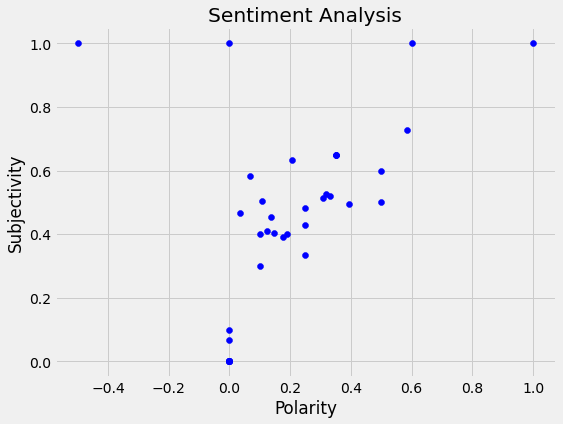

In [ ]:
# Plot the polarity and subjectivity
plt.figure(figsize=(8,6))
for i in range(0, df.shape[0]):
  plt.scatter(df['Polarity'][i], df['Subjectivity'][i], color = 'Blue' )

plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()


In [ ]:
# Get the percentage of positive tweets
ptweets = df[df.Analysis == 'Positive']
ptweets = ptweets['Tweets']

ptweets

0                                          I love carbs
1                  Pretty much an average day back then
3                                             _raj Nice
5      _raj Most people have no idea just how good t...
6      _raj Oh man, home hvac that is super energy e...
7     _raj New HVAC firmware coming soon that will m...
8       True, we somewhat overcompensated on Bluetoo...
10                   From the top of Starbase high bay 
11    : Jay Leno Breaks World Record In Tesla’s New ...
12                    Stacking Super Heavy Aft Section 
14                                           _rmnn Cool
15                                             Epic dog
19     The aliens would say “So Long, and Thanks for...
20      Decided to sell my last remaining house. Jus...
21     _V  After several successful launches, land o...
22    _V  So much more is needed for life to become ...
24                                        This is true 
27     This is inaccurate. Tesla only sold ~10% 